In [94]:
import pandas as pd
import numpy as np

#导入pyplot模块
import matplotlib.pyplot as plt

#使用中文字体
from pylab import mpl
mpl.rcParams['font.sans-serif']="Simsun"
mpl.rcParams['axes.unicode_minus']=False

#使用svg格式，避免图形模糊
%matplotlib inline
%config InlineBackend.figure_format="svg"

#设置缺省颜色和线型
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = (
    cycler(color=['steelblue', 'lightcoral', 'forestgreen', 'darkorange']) 
    + cycler(linestyle=['-', '--', '-.', ':']))


# 切片/索引

## 简单索引

在分析处理表格型数据时，一般用一列数据表示一个变量。

因此，在DataFrame中可以通过[]+列名下标的形式来访问其中的某列或某几列：
 * 以列名为下标返回一列数据（Series）
 * 以列名列表/序列/数组为下标返回由多列组成的DataFrame

In [95]:
# 访问某一列
df = pd.DataFrame(
    {
        "列A": np.array(np.linspace(1,4,4)),
        "列B": pd.Timestamp("20130102"),
        "列C": pd.Series(np.random.default_rng().uniform(0,1,4),
                        index=['a','b','c','d'], dtype="float32"),
        "列D": np.array(np.linspace(1,4,4), dtype="int32"),
        "列E": pd.Categorical(["test", "train", "test", "train"]),
        "列F": ["foo","zoo", "zoo", "zoo"],
    }
)
df["列A"]

a    1.0
b    2.0
c    3.0
d    4.0
Name: 列A, dtype: float64

In [96]:
# 访问某一列
df = pd.DataFrame(
    {
        "列A": np.array(np.linspace(1,4,4)),
        "列B": pd.Timestamp("20130102"),
        "列C": pd.Series(np.random.default_rng().uniform(0,1,4),
                        index=['a','b','c','d'], dtype="float32"),
        "列D": np.array(np.linspace(1,4,4), dtype="int32"),
        "列E": pd.Categorical(["test", "train", "test", "train"]),
        "列F": ["foo","zoo", "zoo", "zoo"],
    }
)
df[["列A","列B"]]

,列A,列B
a,1.0,2013-01-02
b,2.0,2013-01-02
c,3.0,2013-01-02
d,4.0,2013-01-02


## 标签访问

通过DataFrame的**loc**属性，可以以 **loc[行标签,列标签]** 的形式访问指定的部分行列数据

In [97]:
df = pd.DataFrame(
    {
        "列A": np.array(np.linspace(1,4,4)),
        "列B": pd.Timestamp("20130102"),
        "列C": pd.Series(np.random.default_rng().uniform(0,1,4),
                        index=['a','b','c','d'], dtype="float32"),
        "列D": np.array(np.linspace(1,4,4), dtype="int32"),
        "列E": pd.Categorical(["test", "train", "test", "train"]),
        "列F": ["foo","zoo", "zoo", "zoo"],
    }
)
df.loc[['a','b'],["列A","列B"]]

,列A,列B
a,1.0,2013-01-02
b,2.0,2013-01-02


## 整数下标访问

通过DataFrame的**iloc**属性，可以以 **iloc[行,列]** 的形式访问指定的部分行列数据

In [98]:
df = pd.DataFrame(
    {
        "列A": np.array(np.linspace(1,4,4)),
        "列B": pd.Timestamp("20130102"),
        "列C": pd.Series(np.random.default_rng().uniform(0,1,4),
                        index=['a','b','c','d'], dtype="float32"),
        "列D": np.array(np.linspace(1,4,4), dtype="int32"),
        "列E": pd.Categorical(["test", "train", "test", "train"]),
        "列F": ["foo","zoo", "zoo", "zoo"],
    }
)
df.iloc[0:2,2:4]

,列C,列D
a,0.145011,1
b,0.128788,2


## 筛选数据

### 逻辑数组作下标

和NumPy数组类似，DataFrame对象可以用一个逻辑值列表/数组/序列做下标，返回筛选出的行。

In [99]:
df = pd.read_excel("scores.xlsx",index_col="学号")

df1 = df[ (df["班级"]=='电商19') & (df["数学"]>=60)]
df1.head()

,姓名,班级,性别,出生年份,籍贯,数学,语文,英语
学号,,,,,,,,
166241201,析梦菡,电商19,男,2001,浙江,80,60,71
166241202,夕项明,电商19,男,2001,天津,68,95,100
166241203,镜梦桃,电商19,男,2001,西藏,74,56,66
166241204,风凝雁,电商19,男,2001,广东,94,79,81
166241205,毓雨梅,电商19,女,2001,北京,70,65,70


### query方法

当筛选条件比较复杂时，计算逻辑数组的表达式写起来会很繁琐。为此DataFrame提供了**query**方法，可以用一个表达式来表示筛选条件。

In [100]:
df = pd.read_excel("scores.xlsx",index_col="学号")

df1 = df.query(" (班级=='电商19') & (数学>=60) ")
df1.head()

,姓名,班级,性别,出生年份,籍贯,数学,语文,英语
学号,,,,,,,,
166241201,析梦菡,电商19,男,2001,浙江,80,60,71
166241202,夕项明,电商19,男,2001,天津,68,95,100
166241203,镜梦桃,电商19,男,2001,西藏,74,56,66
166241204,风凝雁,电商19,男,2001,广东,94,79,81
166241205,毓雨梅,电商19,女,2001,北京,70,65,70


## 随机抽样

使用DataFrame的**sample**方法可以对表中的数据进行抽样。可以指定抽样的样本数量或者样本的比例
 * 第一个参数**n**抽样的样本数量。
 * **frac**参数指定抽样的比例。如果参数n的值不为None，该参数无效。


### 不放回抽样

当n小于DataFrame中的数据数量，或者frac参数小于1时**sample**方法时，默认进行不放回抽样。

In [130]:
df.sample(10)

,姓名,班级,性别,出生年份,籍贯,数学,语文,英语,总分
学号,,,,,,,,,
166241102,酆友容,信管19,女,2002,广西,81,64,52,197
166241115,声恨之,信管19,女,2002,重庆,41,60,60,161
166241119,侍语雪,信管19,男,2001,四川,81,90,97,268
166241215,淦恨荷,电商19,男,2002,北京,63,97,54,214
166241213,翦清芬,电商19,女,2002,宁夏,64,97,56,217
166241104,闳芳苓,信管19,女,2002,湖北,89,100,90,279
166241206,卞锐翰,电商19,男,2002,江苏,79,85,80,244
166241105,温靖易,信管19,女,2002,吉林,80,70,77,227
166241212,查琴韵,电商19,男,2002,福建,73,89,55,217


### 放回抽样

当**sample**抽样数量大于DataFrame中数据数量，或者**replace**参数值为True时，采用放回抽样。

In [133]:
df.sample(10,replace=True)

,姓名,班级,性别,出生年份,籍贯,数学,语文,英语,总分
学号,,,,,,,,,
166241202,夕项明,电商19,男,2001,天津,68,95,100,263
166241128,祝文漪,信管19,女,2001,新疆,73,88,92,253
166241209,亥恺乐,电商19,女,2001,湖北,66,64,95,225
166241206,卞锐翰,电商19,男,2002,江苏,79,85,80,244
166241214,普依白,电商19,女,2002,北京,63,52,72,187
166241104,闳芳苓,信管19,女,2002,湖北,89,100,90,279
166241123,脱迎波,信管19,男,2002,山西,82,82,64,228
166241206,卞锐翰,电商19,男,2002,江苏,79,85,80,244
166241124,诸葛弘雅,信管19,女,2002,江苏,68,91,70,229


# 处理列

## 增加列

和python字典类似，直接对新列赋值即可加入新的一列

In [101]:
df=pd.DataFrame()
df["A"]=pd.Series(np.random.default_rng().uniform(0,1,4),
                        index=['a','b','c','d'], dtype="float32")
df["B"]=np.linspace(1,4,4)
df

,A,B
a,0.392656,1.0
b,0.417004,2.0
c,0.888639,3.0
d,0.370270,4.0


## 删除列

使用python的**del**指令即可删除列。也可以使用**drop**方法来删除指定的列。

In [102]:
del df["B"]
df

,A
a,0.392656
b,0.417004
c,0.888639
d,0.370270


## 修改列名
使用**rename**方法可以创建修改行/列标签后的新视图：
 * columns参数指定修改列标签
 * index参数指定修改行标签
**rename**的参数可以为字典或者函数：
 * 字典则将字典中各关键字对应的标签修改为对应的值
 * 函数则将各标签替换为以标签为参数调用函数的返回值 

### 以字典为参数

In [103]:
df = pd.DataFrame(
    {
        "列A": np.array(np.linspace(1,4,4)),
        "列B": pd.Timestamp("20130102"),
        "列C": pd.Series(np.random.default_rng().uniform(0,1,4),
                        index=['a','b','c','d'], dtype="float32"),
        "列D": np.array(np.linspace(1,4,4), dtype="int32"),
        "列E": pd.Categorical(["test", "train", "test", "train"]),
        "列F": ["foo","zoo", "zoo", "zoo"],
    }
)

print(df)

#指定字典
df=df.rename(columns={'列A':'ColA','列B':'ColB'})
df

    列A         列B        列C  列D     列E   列F
a  1.0 2013-01-02  0.564481   1   test  foo
b  2.0 2013-01-02  0.023571   2  train  zoo
c  3.0 2013-01-02  0.772137   3   test  zoo
d  4.0 2013-01-02  0.406897   4  train  zoo


,ColA,ColB,列C,列D,列E,列F
a,1.0,2013-01-02,0.564481,1,test,foo
b,2.0,2013-01-02,0.023571,2,train,zoo
c,3.0,2013-01-02,0.772137,3,test,zoo
d,4.0,2013-01-02,0.406897,4,train,zoo


### 以函数为参数

In [104]:
# 指定函数
df=df.rename(columns=lambda s:s+"Col")
df

,ColACol,ColBCol,列CCol,列DCol,列ECol,列FCol
a,1.0,2013-01-02,0.564481,1,test,foo
b,2.0,2013-01-02,0.023571,2,train,zoo
c,3.0,2013-01-02,0.772137,3,test,zoo
d,4.0,2013-01-02,0.406897,4,train,zoo


## 修改列顺序

使用切片索引方法即可改变列的顺序

In [105]:
df = pd.DataFrame(
    {
        "列A": np.array(np.linspace(1,4,4)),
        "列B": pd.Timestamp("20130102"),
        "列C": pd.Series(np.random.default_rng().uniform(0,1,4),
                        index=['a','b','c','d'], dtype="float32"),
        "列D": np.array(np.linspace(1,4,4), dtype="int32"),
        "列E": pd.Categorical(["test", "train", "test", "train"]),
        "列F": ["foo","zoo", "zoo", "zoo"],
    }
)

print(df)
columns=df.columns
print(columns[-1::-1])
df=df[columns[-1::-1]]
df

    列A         列B        列C  列D     列E   列F
a  1.0 2013-01-02  0.461233   1   test  foo
b  2.0 2013-01-02  0.903970   2  train  zoo
c  3.0 2013-01-02  0.877010   3   test  zoo
d  4.0 2013-01-02  0.283162   4  train  zoo
Index(['列F', '列E', '列D', '列C', '列B', '列A'], dtype='object')


,列F,列E,列D,列C,列B,列A
a,foo,test,1,0.461233,2013-01-02,1.0
b,zoo,train,2,0.903970,2013-01-02,2.0
c,zoo,test,3,0.877010,2013-01-02,3.0
d,zoo,train,4,0.283162,2013-01-02,4.0


## 修改列类型

使用**astype**方法可以改变某列的类型

In [106]:
print(df["列F"].dtype)
df["列F"]=df["列F"].astype("category")
df["列F"].dtype

object


CategoricalDtype(categories=['foo', 'zoo'], ordered=False)

# 变量(列)运算

## 基本运算

因为pandas的每一列都是Series并且它们的标签Index都相同，所以各列之间可以直接进行各种算数、关系和逻辑运算。也可以作为参数调用NumPy和scipy的各种函数。

In [107]:
df = pd.DataFrame(
    {
        "A": np.linspace(1,4,10),
        "B": 3,
        "C": np.random.default_rng().uniform(0,1,10),
    }
)

df.head()

,A,B,C
0,1.000000,3,0.558250
1,1.333333,3,0.453463
2,1.666667,3,0.531295
3,2.000000,3,0.317765
4,2.333333,3,0.254488


In [108]:
# 算数运算
df['A']+df['B']

0    4.000000
1    4.333333
2    4.666667
3    5.000000
4    5.333333
5    5.666667
6    6.000000
7    6.333333
8    6.666667
9    7.000000
dtype: float64

In [109]:
# 关系运算
df['A']>df['B']

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7     True
8     True
9     True
dtype: bool

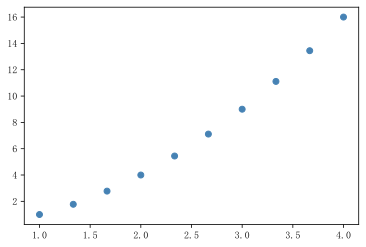

In [110]:
# NumPy函数
y=np.power(df["A"],2)
plt.scatter(df["A"],y)
plt.show()

## 逐列计算

NumPy、scipy中的函数也可以对DataFrame进行逐列计算。

In [111]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

np.sum(df)

sepal length (cm)    876.5
sepal width (cm)     458.6
petal length (cm)    563.7
petal width (cm)     179.9
dtype: float64

## 逐列累计

DataFrame提供了一系列方法可以逐列进行累计计算：
 * **cumsum**计算累加值序列
 * **cumprod**计算累乘值序列
 * **cummax**计算累积最大值序列
 * **cummin**计算累积最小值序列

In [112]:
df = pd.DataFrame(
    {
        "A": np.linspace(1,4,10),
        "B": 3,
        "C": np.random.default_rng().uniform(0,1,10),
    }
)
df.cumsum()

,A,B,C
0,1.000000,3,0.993684
1,2.333333,6,1.532121
2,4.000000,9,2.229954
3,6.000000,12,2.957036
4,8.333333,15,3.928298
5,11.000000,18,4.233432
6,14.000000,21,4.912879
7,17.333333,24,5.102549
8,21.000000,27,5.630963
9,25.000000,30,5.984918


## 滑动窗口（滚动）计算

通过Series/DataFrame的**rolling**方法可以创建滑动窗口对象，使用滑动窗口对象可以对数据按照滑动窗口的方式进行汇总计算：
 * window参数指定滑动窗口大小
 * 在计算前通常应先对数据**排序**。

滑动窗口的一个常见用途是对波动较大的时间序列，用滑动窗口平均的方式进行平滑。

In [113]:
# 取2018-01-01之后浦发银行的股票数据，按照时间从小到大的顺序排序

df = pd.read_csv("../bank_stock.csv", index_col="日期", encoding="GBK")
# 将日期（索引列）转换为日期型
df.index = pd.to_datetime(df.index)

# 筛选数据
df=df[df.index>='2018-01-01']

#排序
df=df.sort_index()
df.head()

,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值
日期,,,,,,,,,,,,,,
2018-01-02,'600000,浦发银行,12.72,12.77,12.60,12.61,12.59,0.13,1.0326,0.1115,31323053,398614966.0,3.733585e+11,3.574799e+11
2018-01-03,'600000,浦发银行,12.66,12.80,12.66,12.73,12.72,-0.06,-0.4717,0.1346,37839101,480954809.0,3.715973e+11,3.557937e+11
2018-01-04,'600000,浦发银行,12.66,12.73,12.62,12.70,12.66,0.00,0.0000,0.0992,27883804,353205838.0,3.715973e+11,3.557937e+11
2018-01-05,'600000,浦发银行,12.69,12.71,12.62,12.67,12.66,0.03,0.2370,0.1104,31026744,393058250.0,3.724779e+11,3.566368e+11
2018-01-08,'600000,浦发银行,12.68,12.71,12.63,12.69,12.69,-0.01,-0.0788,0.1117,31389887,397842209.0,3.721844e+11,3.563557e+11


In [114]:
# 计算15天的滑动平均
rollingmean=df["收盘价"].rolling(window="15D").mean()
rollingmean

日期
2018-01-02    12.720000
2018-01-03    12.690000
2018-01-04    12.680000
2018-01-05    12.682500
2018-01-08    12.682000
                ...    
2019-02-11    10.616667
2019-02-12    10.666667
2019-02-13    10.713333
2019-02-14    10.766667
2019-02-15    10.755000
Name: 收盘价, Length: 271, dtype: float64

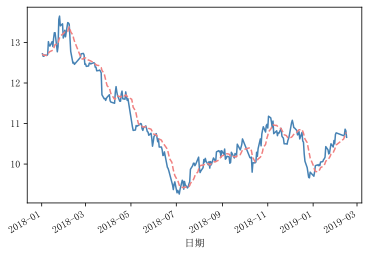

In [115]:
# 绘制时间趋势图
df["收盘价"].plot()
rollingmean.plot()
plt.show()

## 离散化

**cut**函数可以将数值型Series、列表或者多维数组按照区间分段的方式转换成分类型数据。
 * **bins**参数指定区间分段的方式
 * 如果bins参数为**单一整数k**，则将min到max的区间均分为k段
 * 如果bins参数为**列表或数组**，则其中的元素为区间的边界点
 * 缺省创建**有序型**分类序列。

In [116]:
# 等分区间

ages = np.array([10, 15, 13, 12, 23, 25, 28, 59, 60])
c=pd.cut(ages, bins=3)
c

[(9.95, 26.667], (9.95, 26.667], (9.95, 26.667], (9.95, 26.667], (9.95, 26.667], (9.95, 26.667], (26.667, 43.333], (43.333, 60.0], (43.333, 60.0]]
Categories (3, interval[float64, right]): [(9.95, 26.667] < (26.667, 43.333] < (43.333, 60.0]]

In [117]:
# 自设区间边界

c = pd.cut(ages, bins=[0, 18, 35, 70])
c

[(0, 18], (0, 18], (0, 18], (0, 18], (18, 35], (18, 35], (18, 35], (35, 70], (35, 70]]
Categories (3, interval[int64, right]): [(0, 18] < (18, 35] < (35, 70]]

# 排序

## 按索引列排序

**sort_index**方法可以对数据按照索引列排序:
 * **ascending**参数控制是否按照升序排列，默认为True
    

In [118]:
df=pd.read_excel("scores.xlsx",index_col="学号")
df=df.sort_index(ascending=False)
df.head()

,姓名,班级,性别,出生年份,籍贯,数学,语文,英语
学号,,,,,,,,
166241228,潘淑婉,电商19,男,2002,福建,79,81,98
166241227,甫念真,电商19,男,2002,广东,88,66,65
166241226,乾冬卉,电商19,女,2001,甘肃,91,60,62
166241225,郑月华,电商19,男,2002,北京,95,56,96
166241224,戈含之,电商19,男,2001,西藏,64,56,64


## 按照普通列排序

sort_values方法可以对数据按照普通列排序:
  * **by**参数指定按照哪列排序
  * **ascending**参数指定是否按照升序排序，默认为True

In [119]:
df["总分"]=df["数学"]+df["语文"]+df["英语"]
df=df.sort_values(by="总分",ascending=False)
df.head()

,姓名,班级,性别,出生年份,籍贯,数学,语文,英语,总分
学号,,,,,,,,,
166241104,闳芳苓,信管19,女,2002,湖北,89,100,90,279
166241119,侍语雪,信管19,男,2001,四川,81,90,97,268
166241202,夕项明,电商19,男,2001,天津,68,95,100,263
166241217,刑皎洁,电商19,男,2001,上海,83,96,83,262
166241228,潘淑婉,电商19,男,2002,福建,79,81,98,258


## 多列排序
sort_values方法的by参数可以指定多列进行排序。

参与排序的列可以是普通列，**也可以是索引列**。

In [120]:
df=df.sort_values(by=["籍贯","性别","学号"],ascending=True)
df.head(10)

,姓名,班级,性别,出生年份,籍贯,数学,语文,英语,总分
学号,,,,,,,,,
166241217,刑皎洁,电商19,男,2001,上海,83,96,83,262
166241113,汲慧颖,信管19,女,2001,云南,73,85,76,234
166241223,解阳文,电商19,女,2002,云南,72,85,86,243
166241207,亓佩兰,电商19,男,2002,内蒙古,91,62,89,242
166241221,幸晴岚,电商19,男,2001,内蒙古,70,89,97,256
166241205,毓雨梅,电商19,女,2001,北京,70,65,70,205
166241214,普依白,电商19,女,2002,北京,63,52,72,187
166241109,剧星星,信管19,男,2002,北京,66,87,64,217
166241117,翠夜玉,信管19,男,2002,北京,92,64,85,241


# 处理行

## 删除行

使用pandas处理数据时，一般不对原始数据进行删除操作，而是用筛选操作替代删除。

## 增加/修改行

类似python字典，以行标签为下标访问DataFrame对象的**loc**方法并对其赋值，可以增加/修改行

In [126]:
df.tail()

,姓名,班级,性别,出生年份,籍贯,数学,语文,英语,总分
学号,,,,,,,,,
166241125,澹台高丽,信管19,男,2001,贵州,83,84,63,230
166241115,声恨之,信管19,女,2002,重庆,41,60,60,161
166241127,明静安,信管19,女,2002,重庆,83,67,100,250
166241116,皮谷之,信管19,女,2001,黑龙江,68,68,93,229
166241190,张三,信管20,男,2005,北京,47,68,91,206


In [127]:
df.loc[166241190]=["张三","信管20","男",2005,"北京",47,68,91,47+68+91]
df.tail()

,姓名,班级,性别,出生年份,籍贯,数学,语文,英语,总分
学号,,,,,,,,,
166241125,澹台高丽,信管19,男,2001,贵州,83,84,63,230
166241115,声恨之,信管19,女,2002,重庆,41,60,60,161
166241127,明静安,信管19,女,2002,重庆,83,67,100,250
166241116,皮谷之,信管19,女,2001,黑龙江,68,68,93,229
166241190,张三,信管20,男,2005,北京,47,68,91,206


# 处理索引列（行标签列）

## 去除索引列

使用**reset_index**方法可以去除DataFrame的索引列:
 * 如果**drop**参数为True，则删除索引列；如果为False，则将索引列改为普通列。默认为False。

In [128]:
df2=df.reset_index()
df2.head()

,学号,姓名,班级,性别,出生年份,籍贯,数学,语文,英语,总分
0,166241217,刑皎洁,电商19,男,2001,上海,83,96,83,262
1,166241113,汲慧颖,信管19,女,2001,云南,73,85,76,234
2,166241223,解阳文,电商19,女,2002,云南,72,85,86,243
3,166241207,亓佩兰,电商19,男,2002,内蒙古,91,62,89,242
4,166241221,幸晴岚,电商19,男,2001,内蒙古,70,89,97,256


## 设置索引列

使用**set_index**方法可以将普通列设为索引列.

In [129]:
df3=df2.set_index("学号")
df3.head()

,姓名,班级,性别,出生年份,籍贯,数学,语文,英语,总分
学号,,,,,,,,,
166241217,刑皎洁,电商19,男,2001,上海,83,96,83,262
166241113,汲慧颖,信管19,女,2001,云南,73,85,76,234
166241223,解阳文,电商19,女,2002,云南,72,85,86,243
166241207,亓佩兰,电商19,男,2002,内蒙古,91,62,89,242
166241221,幸晴岚,电商19,男,2001,内蒙古,70,89,97,256


# 合并DataFrame

pandas的**concat**函数可以进行各种表的合并操作。

## 按行合并

当要合并的DataFrame中的数据不存在交集时（各行的index/标签均不相同时），我们会作按行合并。

比如，一个DataFrame中是金融1班的学生信息；另一个DataFrame中是金融2班的学生信息。我们用按行合并把这两个DataFrame中的所有学生合在一起。

In [145]:
df1=pd.read_excel("multi-sheet.xlsx",sheet_name="信管19")
df2=pd.read_excel("multi-sheet.xlsx",sheet_name="电商19")

df=pd.concat([df1,df2])
df

,学号,姓名,班级,性别,出生年份,籍贯,数学,语文,英语
0,166241101,童绮琴,信管19,男,2001,天津,99,71,65
1,166241102,酆友容,信管19,女,2002,广西,81,64,52
2,166241103,端木孤菱,信管19,男,2002,湖南,67,90,98
3,166241104,闳芳苓,信管19,女,2002,湖北,89,100,90
4,166241105,温靖易,信管19,女,2002,吉林,80,70,77
5,166241106,祖海亦,信管19,女,2002,天津,72,91,65
6,166241107,考依玉,信管19,男,2002,西藏,73,83,66
7,166241108,娄昊英,信管19,女,2001,湖南,84,85,59
8,166241109,剧星星,信管19,男,2002,北京,66,87,64
9,166241110,呼延寻桃,信管19,女,2001,海南,78,65,92


### 忽略索引合并

如果各DataFrame中的行索引/标签只是简单的序号，可以将**ignore_index**参数设为**True**，在合并时忽略原有行标签并自动生成新标签。

In [146]:
df1=pd.read_excel("multi-sheet.xlsx",sheet_name="信管19")
df2=pd.read_excel("multi-sheet.xlsx",sheet_name="电商19")

df=pd.concat([df1,df2],ignore_index=True)
df

,学号,姓名,班级,性别,出生年份,籍贯,数学,语文,英语
0,166241101,童绮琴,信管19,男,2001,天津,99,71,65
1,166241102,酆友容,信管19,女,2002,广西,81,64,52
2,166241103,端木孤菱,信管19,男,2002,湖南,67,90,98
3,166241104,闳芳苓,信管19,女,2002,湖北,89,100,90
4,166241105,温靖易,信管19,女,2002,吉林,80,70,77
5,166241106,祖海亦,信管19,女,2002,天津,72,91,65
6,166241107,考依玉,信管19,男,2002,西藏,73,83,66
7,166241108,娄昊英,信管19,女,2001,湖南,84,85,59
8,166241109,剧星星,信管19,男,2002,北京,66,87,64
9,166241110,呼延寻桃,信管19,女,2001,海南,78,65,92


### 存在不同列时的处理

如果要合并的几个DataFrame中存在不同的列，合并时需要使用**join**参数指定新的DataFrame应该包含哪些列。可以有两种选择：
 * **'inner'**,取列的**交集**，即只保留所有DataFrame中均存在的列。
 * **'outer'**,取列的**并集**，即保留所有的列，并用NaN填充原表中不存在的值。
 
注：join和inner/outer这几个术语来自数据库。

#### inner join

In [149]:
df1=pd.read_excel("multi-sheet.xlsx",sheet_name="信管19")
df2=pd.read_excel("multi-sheet.xlsx",sheet_name="电商19")

df1=df1[["学号","姓名","班级","性别","数学"]]
df2=df2[["学号","姓名","班级","性别","语文"]]
df=pd.concat([df1,df2],ignore_index=True,join="inner")
df

,学号,姓名,班级,性别
0,166241101,童绮琴,信管19,男
1,166241102,酆友容,信管19,女
2,166241103,端木孤菱,信管19,男
3,166241104,闳芳苓,信管19,女
4,166241105,温靖易,信管19,女
5,166241106,祖海亦,信管19,女
6,166241107,考依玉,信管19,男
7,166241108,娄昊英,信管19,女
8,166241109,剧星星,信管19,男
9,166241110,呼延寻桃,信管19,女


#### outer join

In [150]:
df1=pd.read_excel("multi-sheet.xlsx",sheet_name="信管19")
df2=pd.read_excel("multi-sheet.xlsx",sheet_name="电商19")

df1=df1[["学号","姓名","班级","性别","数学"]]
df2=df2[["学号","姓名","班级","性别","语文"]]
df=pd.concat([df1,df2],ignore_index=True,join="outer")
df

,学号,姓名,班级,性别,数学,语文
0,166241101,童绮琴,信管19,男,99.0,NaN
1,166241102,酆友容,信管19,女,81.0,NaN
2,166241103,端木孤菱,信管19,男,67.0,NaN
3,166241104,闳芳苓,信管19,女,89.0,NaN
4,166241105,温靖易,信管19,女,80.0,NaN
5,166241106,祖海亦,信管19,女,72.0,NaN
6,166241107,考依玉,信管19,男,73.0,NaN
7,166241108,娄昊英,信管19,女,84.0,NaN
8,166241109,剧星星,信管19,男,66.0,NaN
9,166241110,呼延寻桃,信管19,女,78.0,NaN


## 按列合并

当同一个样本的数据分散在多个DataFrame中时，我们需要进行按列合并。例如，现在有金融系1班的高等数学考试成绩表和线性代数成绩表，需要将它们合成一张表。

在合并前应确保各DataFrame中所用的行标签一致。

In [156]:
df1=pd.read_excel("multi-sheet.xlsx",sheet_name="信管19")

df1=df1.set_index("学号")
df2=df1[["姓名","班级","性别","数学"]]
df3=df1[["语文"]]
df=pd.concat([df2,df3], axis=1, join="outer")
df

,姓名,班级,性别,数学,语文
学号,,,,,
166241101,童绮琴,信管19,男,99,71
166241102,酆友容,信管19,女,81,64
166241103,端木孤菱,信管19,男,67,90
166241104,闳芳苓,信管19,女,89,100
166241105,温靖易,信管19,女,80,70
166241106,祖海亦,信管19,女,72,91
166241107,考依玉,信管19,男,73,83
166241108,娄昊英,信管19,女,84,85
166241109,剧星星,信管19,男,66,87
